In [1]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

sec = pdr.get_data_yahoo("005930.KS", start="2018-05-04")
msft = pdr.get_data_yahoo("MSFT", start = "2018-05-04")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [2]:
sec.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-05-04,53000.0,53900.0,51800.0,51900.0,50660.105469,39565391
2018-05-08,52600.0,53200.0,51900.0,52600.0,51343.382812,23104720
2018-05-09,52600.0,52800.0,50900.0,50900.0,49683.992188,16128305
2018-05-10,51700.0,51700.0,50600.0,51600.0,50367.269531,13905263
2018-05-11,52000.0,52200.0,51200.0,51300.0,50074.437500,10314997
2018-05-14,51000.0,51100.0,49900.0,50100.0,48903.105469,14909272
2018-05-15,50200.0,50400.0,49100.0,49200.0,48024.605469,18709146
2018-05-16,49200.0,50200.0,49150.0,49850.0,48659.078125,15918683
2018-05-17,50300.0,50500.0,49400.0,49400.0,48219.828125,10365440


In [3]:
tmp_msft = msft.drop(columns="Volume")
tmp_msft.tail()

,Open,High,Low,Close,Adj Close
Date,,,,,
2020-12-16,214.750000,220.110001,214.720001,219.279999,219.279999
2020-12-17,219.869995,220.889999,217.919998,219.419998,219.419998
2020-12-18,218.589996,219.690002,216.020004,218.589996,218.589996
2020-12-21,217.550003,224.000000,217.279999,222.589996,222.589996
2020-12-22,222.690002,225.630005,221.850006,223.940002,223.940002


In [4]:
sec.index

DatetimeIndex(['2018-05-04', '2018-05-08', '2018-05-09', '2018-05-10',
               '2018-05-11', '2018-05-14', '2018-05-15', '2018-05-16',
               '2018-05-17', '2018-05-18',
               ...
               '2020-12-10', '2020-12-11', '2020-12-14', '2020-12-15',
               '2020-12-16', '2020-12-17', '2020-12-18', '2020-12-21',
               '2020-12-22', '2020-12-23'],
              dtype='datetime64[ns]', name='Date', length=648, freq=None)

In [5]:
import matplotlib.pyplot as plt

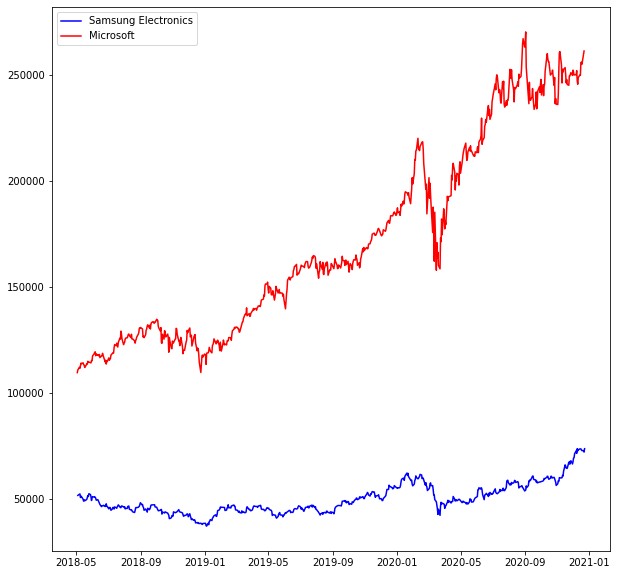

In [6]:
plt.figure(figsize=(10,10))
plt.plot(sec.index, sec.Close, "b", label = "Samsung Electronics")
plt.plot(msft.index, msft.Close*1166.36, "r", label = "Microsoft")
plt.legend(loc="best")
plt.show()

# 일간 변동률로 주가 비교하기

## R_t(오늘 변동률) = ((R_t(오늘 종가) - R_t1(어제 종가)) / R_t1(어제 종가)) *100

In [7]:
sec.Close

Date
2018-05-04    51900.0
2018-05-08    52600.0
2018-05-09    50900.0
2018-05-10    51600.0
2018-05-11    51300.0
               ...   
2020-12-17    73300.0
2020-12-18    73000.0
2020-12-21    73000.0
2020-12-22    72300.0
2020-12-23    73900.0
Name: Close, Length: 648, dtype: float64

In [8]:
# 위의 식으로 오늘 변동률 구하기 이때 shift()함수 이용

sec_dpc = (sec.Close/sec.Close.shift(1) -1) * 100
sec_dpc

Date
2018-05-04         NaN
2018-05-08    1.348748
2018-05-09   -3.231939
2018-05-10    1.375246
2018-05-11   -0.581395
                ...   
2020-12-17   -0.677507
2020-12-18   -0.409277
2020-12-21    0.000000
2020-12-22   -0.958904
2020-12-23    2.213001
Name: Close, Length: 648, dtype: float64

In [9]:
sec_dpc.iloc[0] = 0
sec_dpc.head()

Date
2018-05-04    0.000000
2018-05-08    1.348748
2018-05-09   -3.231939
2018-05-10    1.375246
2018-05-11   -0.581395
Name: Close, dtype: float64

In [10]:
msft_dpc = (msft.Close/msft.Close.shift(1) -1) * 100
msft_dpc

Date
2018-05-03         NaN
2018-05-04    1.158716
2018-05-07    1.113911
2018-05-08   -0.426111
2018-05-09    1.179423
                ...   
2020-12-16    2.405078
2020-12-17    0.063845
2020-12-18   -0.378271
2020-12-21    1.829910
2020-12-22    0.606499
Name: Close, Length: 666, dtype: float64

In [11]:
msft_dpc.iloc[0] = 0
msft_dpc.head()

Date
2018-05-03    0.000000
2018-05-04    1.158716
2018-05-07    1.113911
2018-05-08   -0.426111
2018-05-09    1.179423
Name: Close, dtype: float64

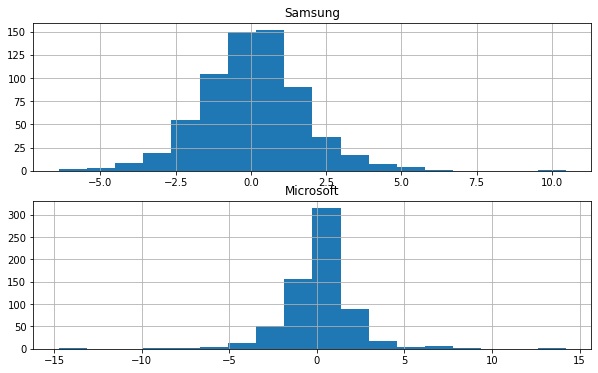

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.subplot(211)
plt.hist(sec_dpc, bins=18)
plt.grid(True)
plt.title("Samsung")

plt.subplot(212)
plt.hist(msft_dpc, bins=18)
plt.grid(True)
plt.title("Microsoft")

plt.show()

In [13]:
sec_dpc.describe()

count    648.000000
mean       0.069713
std        1.746002
min       -6.387665
25%       -0.993377
50%        0.104056
75%        1.038261
max       10.470588
Name: Close, dtype: float64

In [14]:
msft_dpc.describe()

count    666.000000
mean       0.151363
std        2.051162
min      -14.739031
25%       -0.723448
50%        0.184962
75%        1.073414
max       14.216888
Name: Close, dtype: float64

# 일간변동률 누적합

In [15]:
sec_dpc_cs = sec_dpc.cumsum()
sec_dpc_cs

Date
2018-05-04     0.000000
2018-05-08     1.348748
2018-05-09    -1.883192
2018-05-10    -0.507946
2018-05-11    -1.089341
                ...    
2020-12-17    44.329249
2020-12-18    43.919972
2020-12-21    43.919972
2020-12-22    42.961068
2020-12-23    45.174069
Name: Close, Length: 648, dtype: float64

In [16]:
msft_dpc_cs = msft_dpc.cumsum()
msft_dpc_cs

Date
2018-05-03      0.000000
2018-05-04      1.158716
2018-05-07      2.272627
2018-05-08      1.846516
2018-05-09      3.025939
                 ...    
2020-12-16     98.685602
2020-12-17     98.749447
2020-12-18     98.371176
2020-12-21    100.201086
2020-12-22    100.807585
Name: Close, Length: 666, dtype: float64

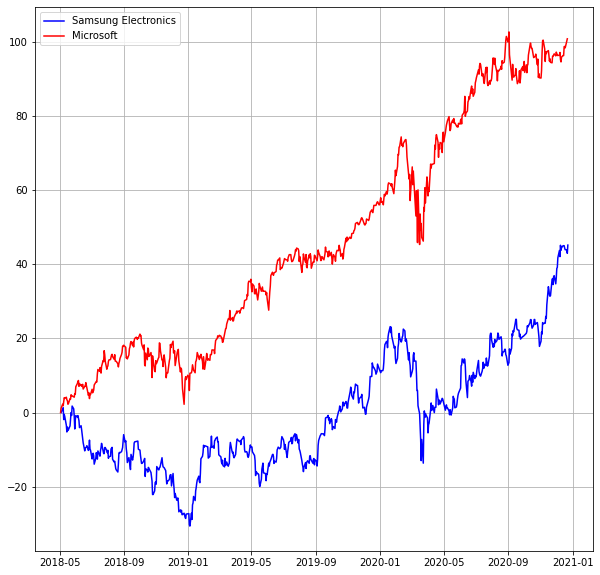

In [17]:
plt.figure(figsize=(10,10))
plt.plot(sec.index, sec_dpc_cs, "b", label = "Samsung Electronics")
plt.plot(msft.index, msft_dpc_cs, "r", label = "Microsoft")
plt.grid(True)
plt.legend(loc="best")
plt.show()

# MDD(최대 손실 낙폭) 
- 특정 기간에 발생한 최고점에서 최저점까지의 가장 큰 손실
- 퀀트 투자에서 수익률을 높이는 것보다 MDD를 낮추는 것이 더 중요
- (최저점 - 최고점)/최저점
- rolling() 함수 이용(이동평균을 구할시 사용)

In [19]:
from pandas_datareader import data as pdr
import yfinance as yf
import matplotlib.pyplot as plt
yf.pdr_override()

In [20]:
kospi = pdr.get_data_yahoo("^KS11","2004-01-04") # 개장일부터 코스피 지수 데이터(^KS11 : 코스피 티커)

window = 252 # 1년 개장일

[*********************100%***********************]  1 of 1 completed


In [21]:
peak = kospi["Adj Close"].rolling(window, min_periods=1).max() # 코스피 종가에서 1년 기간 단위로 최고치
peak

Date
2004-01-05     824.099976
2004-01-06     824.099976
2004-01-07     827.070007
2004-01-08     827.070007
2004-01-09     845.270020
                 ...     
2020-12-17    2771.790039
2020-12-18    2772.179932
2020-12-21    2778.649902
2020-12-22    2778.649902
2020-12-23    2778.649902
Name: Adj Close, Length: 4185, dtype: float64

In [22]:
drawdown = kospi["Adj Close"]/peak - 1.0 # 최고치 대비 현재 코스피 종가가 얼마나 하락했는지
drawdown

Date
2004-01-05    0.000000
2004-01-06   -0.000813
2004-01-07    0.000000
2004-01-08   -0.003531
2004-01-09    0.000000
                ...   
2020-12-17   -0.000491
2020-12-18    0.000000
2020-12-21    0.000000
2020-12-22   -0.016184
2020-12-23   -0.006777
Name: Adj Close, Length: 4185, dtype: float64

In [23]:
max_dd = drawdown.rolling(window, min_periods=1).min() # drawdown에서 1년기간단위로 최저 max_dd(음수임으로 최저치가 최대 낙폭)
max_dd

Date
2004-01-05    0.000000
2004-01-06   -0.000813
2004-01-07   -0.000813
2004-01-08   -0.003531
2004-01-09   -0.003531
                ...   
2020-12-17   -0.357089
2020-12-18   -0.357089
2020-12-21   -0.357089
2020-12-22   -0.357089
2020-12-23   -0.357089
Name: Adj Close, Length: 4185, dtype: float64

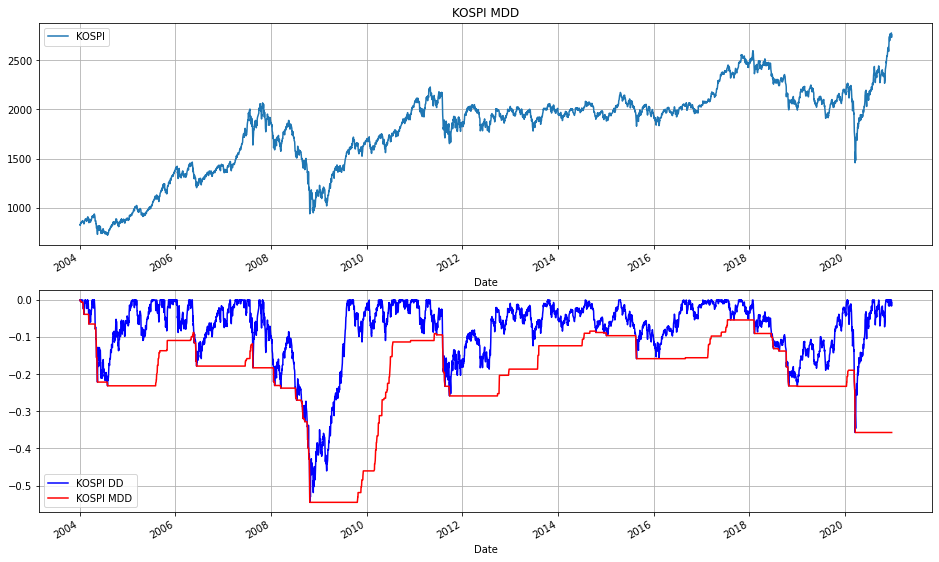

In [24]:
plt.figure(figsize=(16,10))
plt.subplot(211)
kospi.Close.plot(label="KOSPI", title="KOSPI MDD", grid=True, legend=True)
plt.subplot(212)
drawdown.plot(c="blue", label="KOSPI DD", grid=True, legend=True)
max_dd.plot(c="red", label="KOSPI MDD", grid=True, legend=True)
plt.show()

# 미국주식(다우) 와 한국주식(코스피) 비교 

In [25]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [26]:
dow = pdr.get_data_yahoo("^DJI", "2000-01-04")
kospi = pdr.get_data_yahoo("^KS11", "2000-01-04")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


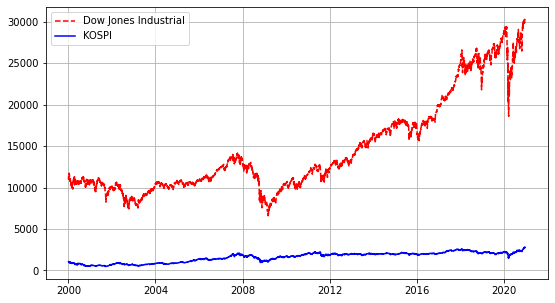

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5))
plt.plot(dow.index, dow.Close, "r--", label = "Dow Jones Industrial")
plt.plot(kospi.index, kospi.Close, "b", label = "KOSPI")
plt.grid(True)
plt.legend(loc="best")
plt.show()

# 지수 기준값이 달라서, 어느 지수가 더 좋은 성과를 냈는지 알아보기 어렵다.

In [28]:
# 비교를 위해 지수화

d = (dow.Close / dow.Close.loc["2000-01-04"]) * 100
k = (kospi.Close / kospi.Close.loc["2000-01-04"]) * 100

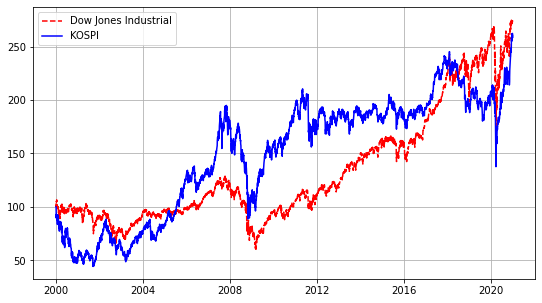

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5))
plt.plot(d.index, d, "r--", label = "Dow Jones Industrial")
plt.plot(k.index, k, "b", label = "KOSPI")
plt.grid(True)
plt.legend(loc="best")
plt.show()

In [30]:
# 산점도 분석
# x : 다우 / y : KOSPI

print(len(dow),len(kospi))

5278 5165


In [31]:
import pandas as pd

df = pd.DataFrame({"DOW" : dow["Close"], "KOSPI": kospi["Close"]})
df

,DOW,KOSPI
Date,,
2000-01-03,11357.509766,NaN
2000-01-04,10997.929688,1059.040039
2000-01-05,11122.650391,986.309998
2000-01-06,11253.259766,960.789978
2000-01-07,11522.559570,948.650024
...,...,...
2020-12-17,30303.369141,2770.429932
2020-12-18,30179.050781,2772.179932
2020-12-21,30216.449219,2778.649902


In [32]:
# NaN 값을 채우기 위해 fillna 이용 / method 는 bfill (다음값으로 NaN채움) ffill(이전값으로 NaN채움)

df.fillna(method="bfill",inplace=True)
df.fillna(method="ffill",inplace=True)
df

,DOW,KOSPI
Date,,
2000-01-03,11357.509766,1059.040039
2000-01-04,10997.929688,1059.040039
2000-01-05,11122.650391,986.309998
2000-01-06,11253.259766,960.789978
2000-01-07,11522.559570,948.650024
...,...,...
2020-12-17,30303.369141,2770.429932
2020-12-18,30179.050781,2772.179932
2020-12-21,30216.449219,2778.649902


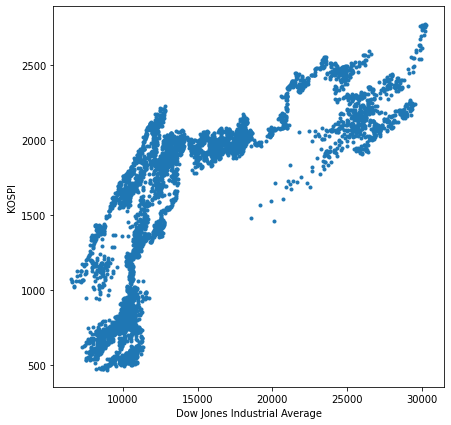

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
plt.scatter(df.DOW, df.KOSPI, marker=".")
plt.xlabel("Dow Jones Industrial Average")
plt.ylabel("KOSPI")
plt.show()

# 선형 회귀 분석

In [39]:
from scipy import stats

regr = stats.linregress(df.DOW, df.KOSPI)
regr

LinregressResult(slope=0.07773611839435411, intercept=446.88826544948574, rvalue=0.7484918836614591, pvalue=0.0, stderr=0.0009390588203794271)

In [40]:
df.corr()

,DOW,KOSPI
DOW,1.000000,0.748492
KOSPI,0.748492,1.000000


In [44]:
# 결정계수 구하기 (결정계수는 = 상관계수^2)
# 결정계수가 1이면 회귀선에 모든값 존재 / 0 이면 모든값 회귀선과 관계 X
r_value = df.DOW.corr(df.KOSPI)
r_value

0.7484918836614591

In [46]:
r_squared = r_value**2
r_squared

0.5602400999070792

In [47]:
# 최종 회귀분석

import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
from scipy import stats
import matplotlib.pyplot as plt

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


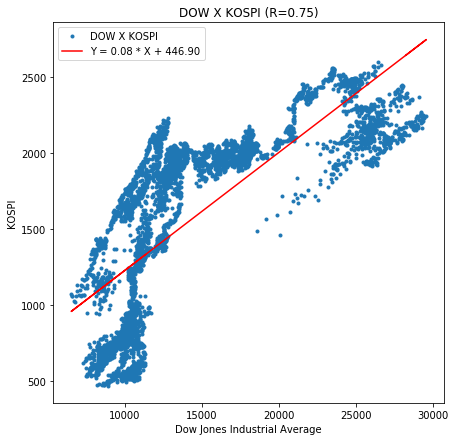

In [52]:
dow = pdr.get_data_yahoo("^DJI", "2000-01-04")
kospi = pdr.get_data_yahoo("^KS11", "2000-01-04")

df = pd.DataFrame({"X" : dow["Close"], "Y": kospi["Close"]})
df.fillna(method="bfill",inplace=True)
df.fillna(method="ffill",inplace=True)

regr = stats.linregress(df.X, df.Y)
regr_line = f'Y = {regr.slope:.2f} * X + {regr.intercept:.2f}'

plt.figure(figsize=(7,7))
plt.plot(df.X, df.Y, ".")
plt.plot(df.X, regr.slope * df.X + regr.intercept, "r")
plt.legend(["DOW X KOSPI", regr_line])
plt.title(f'DOW X KOSPI (R={regr.rvalue:.2f})')
plt.xlabel("Dow Jones Industrial Average")
plt.ylabel("KOSPI")
plt.show()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


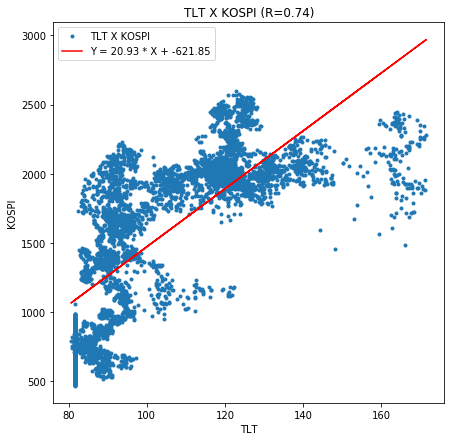

In [55]:
# 미국 국채와 코스피 상관관계
tlt = pdr.get_data_yahoo("TLT", "2000-01-04")
kospi = pdr.get_data_yahoo("^KS11", "2000-01-04")

df = pd.DataFrame({"X" : tlt["Close"], "Y": kospi["Close"]})
df.fillna(method="bfill",inplace=True)
df.fillna(method="ffill",inplace=True)

regr = stats.linregress(df.X, df.Y)
regr_line = f'Y = {regr.slope:.2f} * X + {regr.intercept:.2f}'

plt.figure(figsize=(7,7))
plt.plot(df.X, df.Y, ".")
plt.plot(df.X, regr.slope * df.X + regr.intercept, "r")
plt.legend(["TLT X KOSPI", regr_line])
plt.title(f'TLT X KOSPI (R={regr.rvalue:.2f})')
plt.xlabel("TLT")
plt.ylabel("KOSPI")
plt.show()